In [1]:
import h5py
import numpy as np
from matplotlib import pyplot as plt

In [2]:
fpath_eddy = '/gscratch/jisao/mclaret/GL64/Juillet/'
f = h5py.File(fpath_eddy + 'eddy_tracks.mat')

# Arrange data into a list of dictionaries
data = f['tracks']            # relevant variables
varnames = list(f['tracks'])  # variable names
ntracks = len(data['x1'])     # number of tracks (should match with length of data in 'x1')

tracks = []                   # initialize list of eddy tracks

# add dictionaries for each variable to the corresponding eddy index (0 - N-1)
for itrack in range(ntracks):
    variables = {var:[] for var in varnames}  # initialize a dictionary with each variable name
    for var in varnames:
        # go through each variable
        if var[0:6] == 'shapes':
            # translate shapes data to list of numpy arrays (one array for each time step)
            coordinates = []                             # initialize list of coordinates
            numSteps = len(f[data[var][itrack,0]][(0)])  # number of timesteps
            # each timestep has its own hdf5 object reference, so append each step to a list
            for step in range(numSteps):
                coords = np.array(f[f[data[var][itrack,0]][(0, step)]])
                coordinates.append(coords)
            variables[var] = coordinates
        else:
            # translate data from hdf5 object reference to numpy array
            variables[var] = np.array(f[data[var][itrack,0]][(0)])
    tracks.append(variables)
    
print('Number of eddies:', len(tracks))

Number of eddies: 111


In [3]:
lifetime = 0           # lifetime to keep (in hours)
ntracks = len(tracks)  # number of eddies
cyclones = []          # list to hold cyclonic eddies
anticyclones = []      # list to hold anticyclonic eddies
nIssue = 0
wIssue = []

for i, track in enumerate(tracks):
    #timesteps = track['step'][-1] - track['step'][0] + 1
    if track['type'][0] == 1.:
        # add to list of cyclonic eddies
        cyclones.append(track)
    if track['type'][0] == -1.:
        # add to list of cyclonic eddies
        anticyclones.append(track)
print('num cyclones:', len(cyclones))
print('num anticyclones:', len(anticyclones))

num cyclones: 53
num anticyclones: 58


cyclones
mean lifetime: 148.52830188679246 hrs
shortest lifetime: 1.0 hrs
longest lifetime: 371.0 hrs


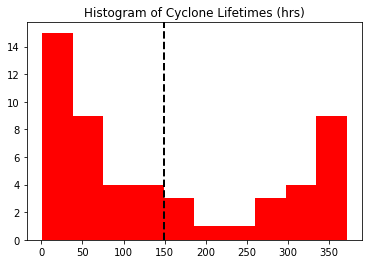

In [4]:
lftmsCyclones = []
lftmMeanCyclones = 0
lftmHiCyclones = 0
lftmLoCyclones = 500
# distMeanCyclones = 0
# distHiCyclones = 0
# distLoCyclones = 0
for i, track in enumerate(cyclones):
    lftm = track['step'][-1] - track['step'][0] + 1  # calculate lifetime
    lftmsCyclones.append(lftm)                       # add to list for histo
    lftmMeanCyclones += lftm                         # add to sum for mean
    
    # lifetime highs and lows
    if lftm > lftmHiCyclones:
        lftmHiCyclones = lftm
    elif lftm < lftmLoCyclones:
        lftmLoCyclones = lftm
lftmMeanCyclones /= len(cyclones)
print('cyclones')
print('mean lifetime:', lftmMeanCyclones, 'hrs')
print('shortest lifetime:', lftmLoCyclones, 'hrs')
print('longest lifetime:', lftmHiCyclones, 'hrs')
plt.hist(lftmsCyclones, bins=10, color='r')
plt.axvline(x = lftmMeanCyclones, color='k', linewidth=2, linestyle='dashed')
plt.title('Histogram of Cyclone Lifetimes (hrs)')
plt.show()

anticyclones
mean lifetime: 100.60344827586206 hrs
shortest lifetime: 1.0 hrs
longest lifetime: 371.0 hrs


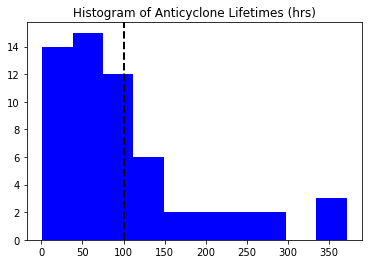

In [5]:
lftmsAnticyclones = []
lftmMeanAnticyclones = 0
lftmHiAnticyclones = 0
lftmLoAnticyclones = 500
# distMeanAnticyclones = 0
# distHiAnticyclones = 0
# distLoAnticyclones = 0
for i, track in enumerate(anticyclones):
    lftm = track['step'][-1] - track['step'][0] + 1  # calculate lifetime
    lftmsAnticyclones.append(lftm)                       # add to list for histo
    lftmMeanAnticyclones += lftm                         # add to sum for mean
    
    # lifetime highs and lows
    if lftm > lftmHiAnticyclones:
        lftmHiAnticyclones = lftm
    elif lftm < lftmLoAnticyclones:
        lftmLoAnticyclones = lftm
lftmMeanAnticyclones /= len(anticyclones)

print('anticyclones')
print('mean lifetime:', lftmMeanAnticyclones, 'hrs')
print('shortest lifetime:', lftmLoAnticyclones, 'hrs')
print('longest lifetime:', lftmHiAnticyclones, 'hrs')
plt.hist(lftmsAnticyclones, bins=10, color='b')
plt.axvline(x = lftmMeanAnticyclones, color='k', linewidth=2, linestyle='dashed')
plt.title('Histogram of Anticyclone Lifetimes (hrs)')
plt.show()